### Introduction to Convolution Neural Networks and Computer Vision with Tensorflow

- Computer vision is the pratice of writing algorithms which can discover patterens in Visial data. Like a self driving car Camera is capable of recognizing car/objects in front of it.

# Get the Data

In [1]:
# /home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak

## Inspect the data.
A very Crucial step at the begining of any machine learning project is to become one with the data. 

And for computer vision project you need to visualize many samples of your data.

In [2]:
!ls /home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak

test  train


In [3]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [4]:
# Another way of listing the files and folders inside a directory

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##### To visualize our images let's get the class names programatically.

In [5]:
# Get the class names promatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

In [6]:
# Lets visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    random_image = random.sample(os.listdir(target_folder),1)

    img = mpimg.imread(os.path.join(target_folder,random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    return img

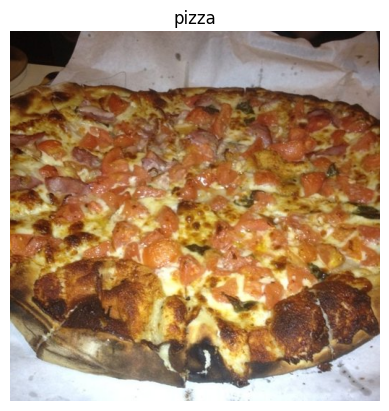

In [7]:
target_dir = "/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/train"
target_class = class_names[0]
img = view_random_image(target_dir, target_class)

In [8]:
import tensorflow as tf
tf.constant(img)

2023-09-10 09:54:07.608150: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-10 09:54:07.667232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 09:54:07.960962: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 09:54:07.963522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 09:54:08.763998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 21,  13,  11],
        [ 16,  10,  10],
        [ 15,   9,   9]],

       [[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 20,  12,  10],
        [ 16,  10,  10],
        [ 17,  11,  11]],

       [[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 18,  10,   8],
        [ 16,  10,  10],
        [ 19,  13,  13]],

       ...,

       [[199, 206, 222],
        [200, 207, 223],
        [201, 208, 224],
        ...,
        [184, 186, 201],
        [186, 185, 201],
        [186, 185, 201]],

       [[201, 208, 224],
        [200, 207, 223],
        [200, 207, 223],
        ...,
        [182, 184, 199],
        [186, 185, 201],
        [187, 186, 202]],

       [[199, 206, 222],
        [197, 204, 220],
        [196, 203, 219],
        ...,
        [181, 183, 19

In [9]:
# View the image shape
img.shape

(512, 512, 3)

In [10]:
# Normalize the Data
img/255.

array([[[0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        ...,
        [0.08235294, 0.05098039, 0.04313725],
        [0.0627451 , 0.03921569, 0.03921569],
        [0.05882353, 0.03529412, 0.03529412]],

       [[0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        ...,
        [0.07843137, 0.04705882, 0.03921569],
        [0.0627451 , 0.03921569, 0.03921569],
        [0.06666667, 0.04313725, 0.04313725]],

       [[0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        [0.03921569, 0.02352941, 0.01960784],
        ...,
        [0.07058824, 0.03921569, 0.03137255],
        [0.0627451 , 0.03921569, 0.03921569],
        [0.0745098 , 0.05098039, 0.05098039]],

       ...,

       [[0.78039216, 0.80784314, 0.87058824],
        [0.78431373, 0.81176471, 0.8745098 ],
        [0.78823529, 0

### An end-to-end example 

Lets build a convolution neural network to find patterens in our data. Steps we need to do
- Load our images
- Preprocess our images
- Build a CNN
- compile the CNN
- fit the CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Setup the data preprocessing ( get all of the pixel values between 0 and 1). also called scalling/normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/train"
test_dir = "/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/train"

# Import Data from Directories and turn it into batches
train_data  = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size=32,
                                                target_size=(244,244),
                                                class_mode = "binary",
                                                seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)

# Build the CNN model ( same as the TINY VGG on the CNN Expainer website)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'), 
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'), # Gives the max of a matrix
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5


2023-09-10 09:54:11.697509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.6613

2023-09-10 09:54:18.213157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 10s 186ms/step - loss: 0.6243 - accuracy: 0.6613 - val_loss: 0.4218 - val_accuracy: 0.8127
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4341 - accuracy: 0.8033 - val_loss: 0.3828 - val_accuracy: 0.8347
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3743 - accuracy: 0.8347 - val_loss: 0.3352 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3517 - accuracy: 0.8633 - val_loss: 0.2899 - val_accuracy: 0.8907
Epoch 5/5
47/47 [==============================] - 7s 154ms/step - loss: 0.3007 - accuracy: 0.8833 - val_loss: 0.2335 - val_accuracy: 0.9187


In [13]:
len(train_data) # batch size 1500/32

47

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

In [15]:
import pandas as pd

<Axes: >

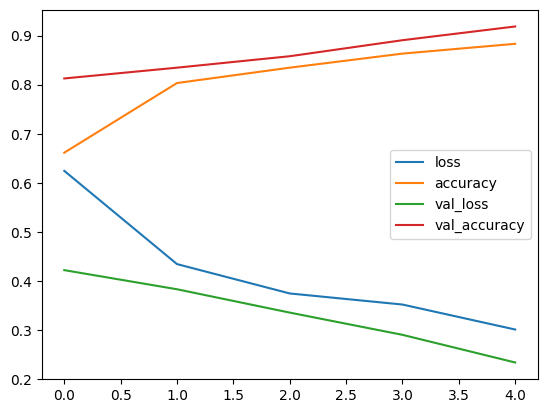

In [16]:
pd.DataFrame(history.history).plot()

#### Let's Create the neural netword from previous section to see how it performs on the image dataset

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244,244,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data,epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data)

Epoch 1/5


2023-09-10 09:54:51.088601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


46/47 [============================>.] - ETA: 0s - loss: 2.2990 - accuracy: 0.5606

2023-09-10 09:54:53.456375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 4s 84ms/step - loss: 2.2658 - accuracy: 0.5613 - val_loss: 0.6858 - val_accuracy: 0.5387
Epoch 2/5
47/47 [==============================] - 4s 83ms/step - loss: 0.6888 - accuracy: 0.5187 - val_loss: 0.6845 - val_accuracy: 0.5193
Epoch 3/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6799 - accuracy: 0.5480 - val_loss: 0.6736 - val_accuracy: 0.6233
Epoch 4/5
47/47 [==============================] - 4s 85ms/step - loss: 0.6734 - accuracy: 0.6240 - val_loss: 0.6449 - val_accuracy: 0.6147
Epoch 5/5
47/47 [==============================] - 4s 83ms/step - loss: 0.6471 - accuracy: 0.6107 - val_loss: 0.6062 - val_accuracy: 0.6993


#### Trying to Improve the model now

In [18]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244,244,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy']) 

# Fit the model
model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data)

Epoch 1/5


2023-09-10 09:55:10.936597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 3.6711 - accuracy: 0.6327

2023-09-10 09:55:17.305014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 9s 180ms/step - loss: 3.6711 - accuracy: 0.6327 - val_loss: 1.1962 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 1.3192 - accuracy: 0.7000 - val_loss: 0.9673 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 7s 159ms/step - loss: 0.8605 - accuracy: 0.7340 - val_loss: 1.0657 - val_accuracy: 0.5913
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6185 - accuracy: 0.7613 - val_loss: 0.7318 - val_accuracy: 0.7413
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.5336 - accuracy: 0.7787 - val_loss: 0.6344 - val_accuracy: 0.7527


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 178608)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               17860900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


## Insights

Model 1 have 36,651 parameters as compared to model 3 with 17,881,201. 487 times larger.

That's why CNN's are used for image classification problems.

But Sometimes dense network can perform better too on the image data but that depends on the requirements.

In [21]:
17881201/36651

487.8775749638482

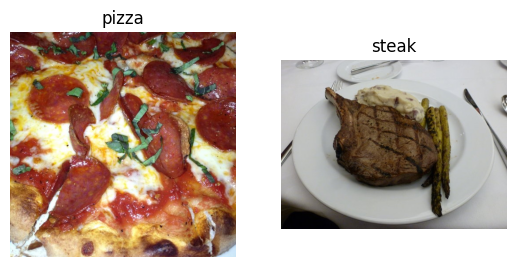

In [22]:
# Visualize the Data

plt.figure()
plt.subplot(1,2,1)
img1 = view_random_image("/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/test", "pizza")
plt.subplot(1,2,2)
img2 = view_random_image("/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/test","steak")


### Breakdown our CNN

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_dir = "/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/train"
test_dir = "/home/abdulrahman/Documents/TensorFlow-Developer-Certificate-Guide/pizza_steak/test"

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of train batch size
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [28]:
# How many Batches are there? 
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# How the image tensor look like?
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.7411765 , 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.75294125, 0.5529412 , 0.34509805],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.36862746, 0.1254902 , 0.04313726],
          [0.37254903, 0.12941177, 0.04705883],
          [0.36078432, 0.12156864, 0.03921569],
          ...,
          [0.7568628 , 0.5686275 , 0.3803922 ],
          [0.7372549 , 0.5294118 , 0.31764707],
          [0.76470596, 0.53333336, 0.29803923]],
 
         ...,
 
         [[0.6039216 , 0.5764706 , 0.5058824 ],
          [0.6    

In [31]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [33]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),

    Dense(1, activation='sigmoid')
])

In [34]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [35]:
# Get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 238, 238, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 566440)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-09-10 09:55:53.022120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.8648 - accuracy: 0.6793

2023-09-10 09:55:59.986498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 9s 177ms/step - loss: 0.8648 - accuracy: 0.6793 - val_loss: 0.4457 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 7s 157ms/step - loss: 0.4272 - accuracy: 0.8067 - val_loss: 0.4209 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3002 - accuracy: 0.8793 - val_loss: 0.4437 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.1725 - accuracy: 0.9500 - val_loss: 0.4605 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.0781 - accuracy: 0.9793 - val_loss: 0.4456 - val_accuracy: 0.8060


In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 238, 238, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 566440)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


<Axes: >

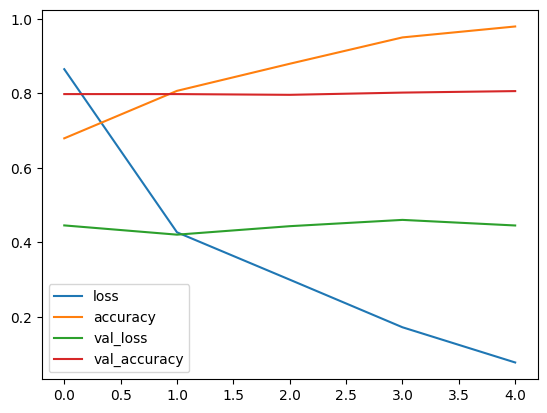

In [38]:
# Lets plot the training Curves
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [39]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="Accuracy")
    plt.plot(epochs, val_accuracy, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

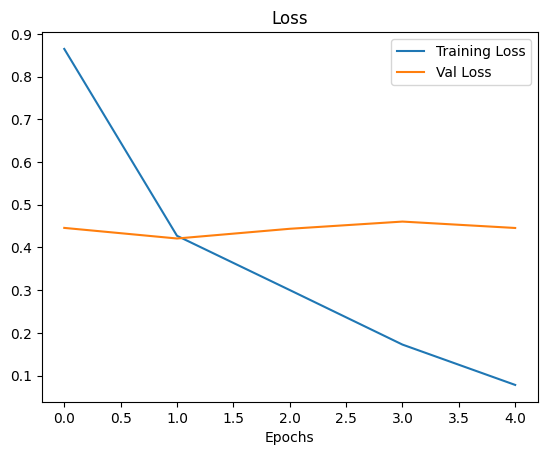

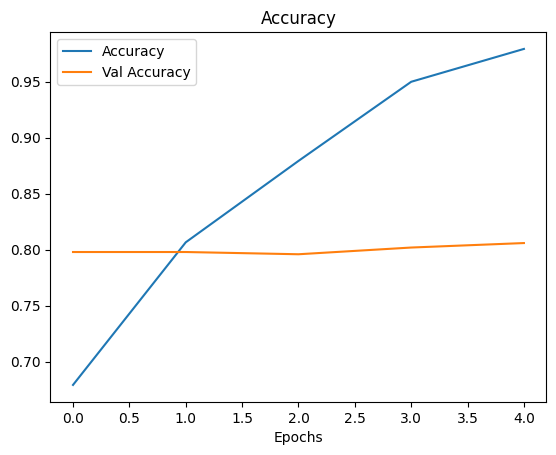

In [40]:
plot_loss_curves(history_4)

## Adjust the model parameters.

Fitting a machine learning model comes in 3 stages.

1. Creating a baseline.
2. Beat the baseline by overfitting a larger model.
3. Reduce Overfitting.

Ways to induce overfitting.

1. Increase the number of conv layers
2. increase the numbers of conv filteres
3. Add more Dense layers to the output of flattened layer.

Reduce Overfitting.

1. Add data Augmentation
2. Add regularization layers ( Such as MaxPool2D )
3. Add more data ...

In [41]:
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(244,244,3)),
    MaxPooling2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),

    Dense(1, activation='sigmoid')
])

In [42]:
model_5.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [43]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5


2023-09-10 09:56:31.732145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.6720

2023-09-10 09:56:36.376345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 6s 114ms/step - loss: 0.5985 - accuracy: 0.6720 - val_loss: 0.4584 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4568 - accuracy: 0.7953 - val_loss: 0.4015 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4086 - accuracy: 0.8233 - val_loss: 0.3544 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 4s 94ms/step - loss: 0.3917 - accuracy: 0.8320 - val_loss: 0.3422 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 5s 96ms/step - loss: 0.3595 - accuracy: 0.8473 - val_loss: 0.3445 - val_accuracy: 0.8440


In [44]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 121, 121, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 10)      

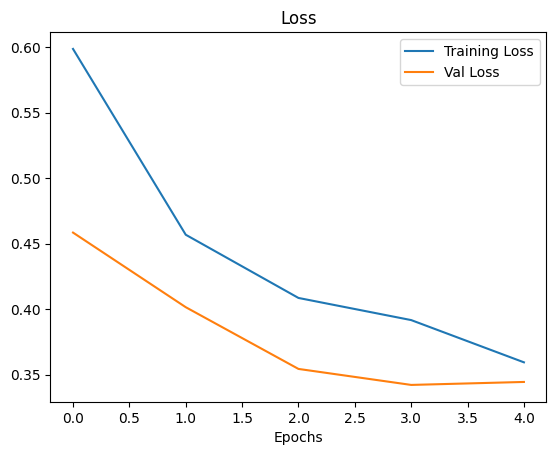

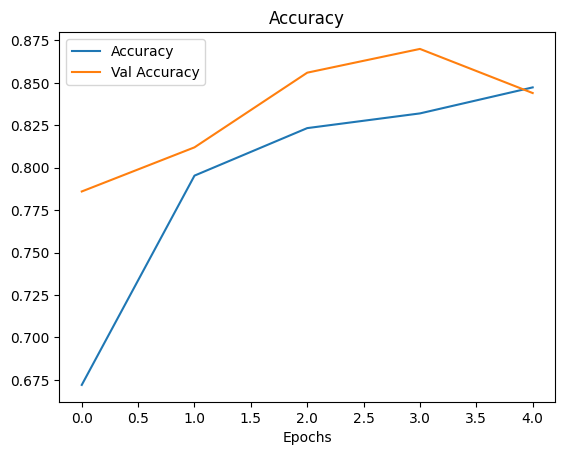

In [45]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [46]:
# Create the ImageDataGenerator training instance with data augumentation

# Create ImageDataGenerator training instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagenn = ImageDataGenerator(rescale=1/255.)

test_datagne = ImageDataGenerator(rescale=1/255.)

In [47]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_aug.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')
     

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


## Visualize some of the augmented Data

In [48]:
images, labels = train_data.next()

aug_images, aug_labels = train_data_augmented.next()

Showing Image 0


(-0.5, 223.5, 223.5, -0.5)

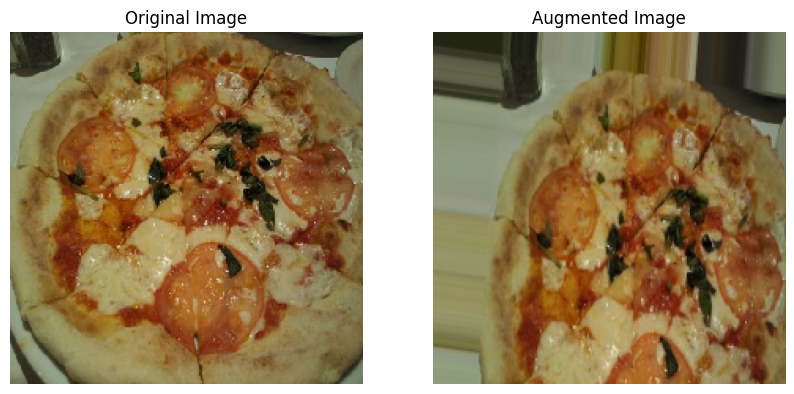

In [49]:
# Show original image and augmented image
import random
random_number = random.randint(0,32)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
print(f"Showing Image {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(aug_images[random_number])
plt.title("Augmented Image")
plt.axis(False)


In [50]:
# Create the Model
model_6 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])


In [51]:
# Fitting the model on Augmented training data
history_6 = model_6.fit(train_data_augmented, epochs=5, 
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5


2023-09-10 09:56:57.965705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.4333

2023-09-10 09:57:08.495802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 11s 229ms/step - loss: 0.7127 - accuracy: 0.4333 - val_loss: 0.6852 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.7042 - accuracy: 0.5040 - val_loss: 0.6902 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6959 - accuracy: 0.4800 - val_loss: 0.6863 - val_accuracy: 0.5560
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6909 - accuracy: 0.5773 - val_loss: 0.6763 - val_accuracy: 0.6040
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6979 - accuracy: 0.5460 - val_loss: 0.6701 - val_accuracy: 0.5260


#### Lets shuffle our training data and aumented trainig data and train another model same as before and check the training accuracy

In [52]:
# Import the data and augument it and shuffle it from the training directory
train_data_aug_shuffled =  train_datagen_aug.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.


In [53]:
# Build the model
model_7 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),

    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [54]:
# Fit the Model
history_7 = model_7.fit(train_data_aug_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-09-10 09:57:50.736828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.6373

2023-09-10 09:58:02.477792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 13s 261ms/step - loss: 0.6363 - accuracy: 0.6373 - val_loss: 0.4981 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5959 - accuracy: 0.6813 - val_loss: 0.4707 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5001 - accuracy: 0.7733 - val_loss: 0.3821 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.5040 - accuracy: 0.7647 - val_loss: 0.4190 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4737 - accuracy: 0.7860 - val_loss: 0.3458 - val_accuracy: 0.8480


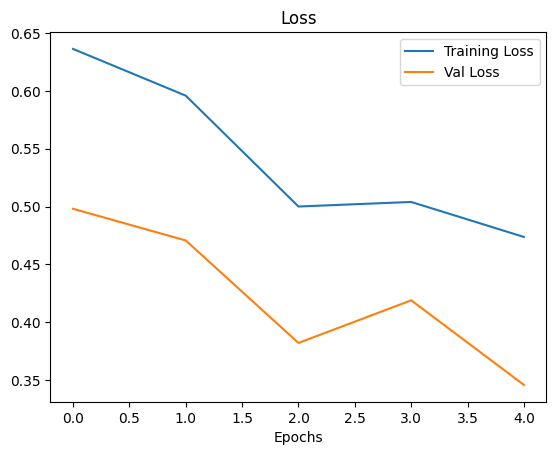

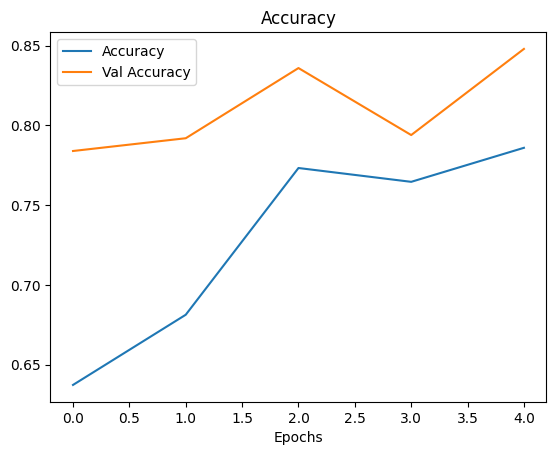

In [55]:
plot_loss_curves(history_7)

### Making Predictions using our own data